In [2]:
import os

import numpy as np
import gymnasium as gym

import gym_env

from LinearRL import LinearRL
from utils import make_plots, record_trials, record_trajectory, test_agent

### Original Reward
Initially show the agent solving the maze with the reward in the top right of the environemnt

In [5]:
# Initialize agent
agent = LinearRL(env_name="tolman-10x10-latent", _lambda=1.0)

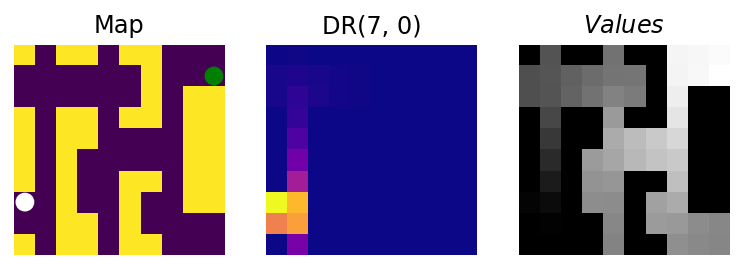

Start location: [7 0], Target location: [1 9]
Starting in state: [7 0]
Took action: 1 and arrived in state: [7 1]
Took action: 2 and arrived in state: [6 1]
Took action: 2 and arrived in state: [5 1]
Took action: 2 and arrived in state: [4 1]
Took action: 2 and arrived in state: [3 1]
Took action: 2 and arrived in state: [2 1]
Took action: 1 and arrived in state: [2 2]
Took action: 1 and arrived in state: [2 3]
Took action: 1 and arrived in state: [2 4]
Took action: 0 and arrived in state: [3 4]
Took action: 0 and arrived in state: [4 4]
Took action: 1 and arrived in state: [4 5]
Took action: 1 and arrived in state: [4 6]
Took action: 1 and arrived in state: [4 7]
Took action: 2 and arrived in state: [3 7]
Took action: 2 and arrived in state: [2 7]
Took action: 2 and arrived in state: [1 7]
Took action: 1 and arrived in state: [1 8]
Took action: 1 and arrived in state: [1 9]
Took 19 steps


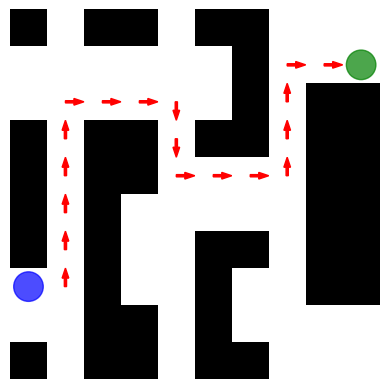

In [6]:
# Learn the current environment
agent.learn()

# Plot the map, DR at starting state, and value function
make_plots(agent)

# Test agent
print(f"Start location: {agent.start_loc}, Target location: {agent.target_loc}")
traj_not_blocked = test_agent(agent)

# Plot trajectory
record_trajectory(agent, traj_not_blocked)

### Move Reward
Now the reward will move to the bottom right of the maze and the agent will replan using a one-step update to the default representation

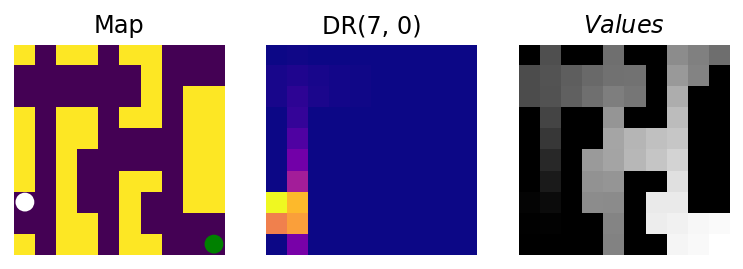

Start location: [7 0], Target location: [9 9]
Starting in state: [7 0]
Took action: 1 and arrived in state: [7 1]
Took action: 2 and arrived in state: [6 1]
Took action: 2 and arrived in state: [5 1]
Took action: 2 and arrived in state: [4 1]
Took action: 2 and arrived in state: [3 1]
Took action: 2 and arrived in state: [2 1]
Took action: 1 and arrived in state: [2 2]
Took action: 1 and arrived in state: [2 3]
Took action: 1 and arrived in state: [2 4]
Took action: 0 and arrived in state: [3 4]
Took action: 0 and arrived in state: [4 4]
Took action: 1 and arrived in state: [4 5]
Took action: 1 and arrived in state: [4 6]
Took action: 1 and arrived in state: [4 7]
Took action: 0 and arrived in state: [5 7]
Took action: 0 and arrived in state: [6 7]
Took action: 0 and arrived in state: [7 7]
Took action: 0 and arrived in state: [8 7]
Took action: 1 and arrived in state: [8 8]
Took action: 1 and arrived in state: [8 9]
Took action: 0 and arrived in state: [9 9]
Took 21 steps


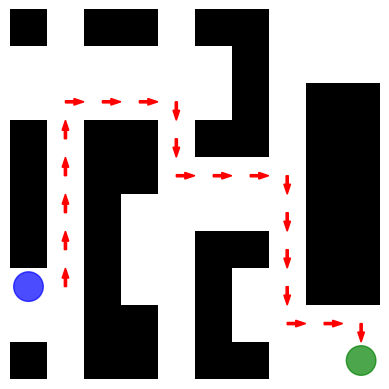

In [7]:
# Have the agent efficiently replan to changed environment
agent.replan(new_env="tolman-10x10-latent-new-goal", loc=(9, 9))
# Update target location
agent.target_loc = np.array((9,9))

# Plot the map, DR at starting state, and value function
make_plots(agent)

# Test agent
print(f"Start location: {agent.start_loc}, Target location: {agent.target_loc}")
traj_blocked = test_agent(agent)

# Plot trajectory
record_trajectory(agent, traj_blocked)